# Tilstandsmaskiner

In [5]:
import random
from enum import Enum


class Weather(Enum):
    SOL = 1
    REGN = 2

## Finite State Machines

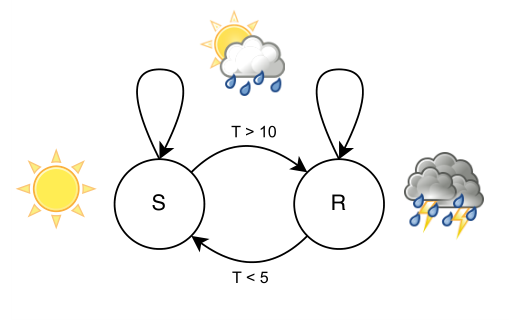

In [6]:
def weather_fsm_transition(state, temperature):
    if state == Weather.SOL and temperature > 10:
        return Weather.REGN
    elif state == Weather.REGN and temperature < 5:
        return Weather.SOL
    else:
        return state


def simulate_weather_fsm(initial_state, temperatures):
    state = initial_state
    prev_state = state
    for i, temp in enumerate(temperatures, start=1):
        state = weather_fsm_transition(state, temp)
        print(f"{i}) I går: {prev_state.name}, Temperatur: {temp}, I dag: {state.name}")
        prev_state = state


simulate_weather_fsm(Weather.SOL, [12, 8, 3, 6, 11, 4, 2, 9])

1) I går: SOL, Temperatur: 12, I dag: REGN
2) I går: REGN, Temperatur: 8, I dag: REGN
3) I går: REGN, Temperatur: 3, I dag: SOL
4) I går: SOL, Temperatur: 6, I dag: SOL
5) I går: SOL, Temperatur: 11, I dag: REGN
6) I går: REGN, Temperatur: 4, I dag: SOL
7) I går: SOL, Temperatur: 2, I dag: SOL
8) I går: SOL, Temperatur: 9, I dag: SOL


## Markov Chains

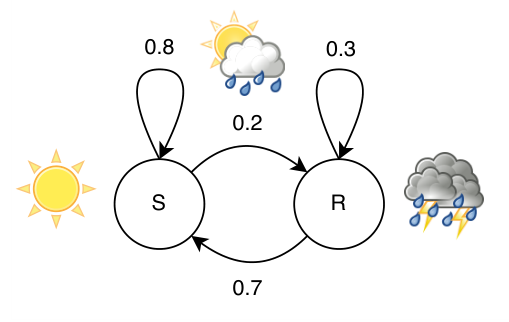

In [7]:
def weather_mc_transition(state):
    r = random.random()
    if state == Weather.SOL:
        return Weather.SOL if r < 0.8 else Weather.REGN
    else:
        return Weather.REGN if r < 0.3 else Weather.SOL


def simulate_weather_mc(initial_state):
    state = initial_state
    prev_state = state
    for i in range(1, 9):
        state = weather_mc_transition(state)
        print(f"{i}) I går: {prev_state.name}, I dag: {state.name}")
        prev_state = state


simulate_weather_mc(Weather.SOL)

1) I går: SOL, I dag: SOL
2) I går: SOL, I dag: SOL
3) I går: SOL, I dag: REGN
4) I går: REGN, I dag: SOL
5) I går: SOL, I dag: SOL
6) I går: SOL, I dag: SOL
7) I går: SOL, I dag: SOL
8) I går: SOL, I dag: SOL


## Tsetlin Automata

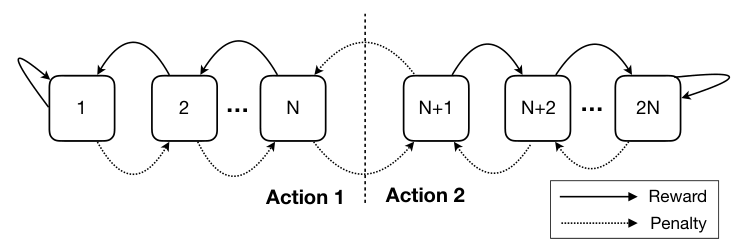

In [8]:
from dataclasses import dataclass, field
import random


@dataclass
class TsetlinAutomaton:
    memory_size: int
    state: int = field(init=False)

    def __post_init__(self) -> None:
        self.state = random.randint(1, 2 * self.memory_size)

    @property
    def action(self) -> bool:
        return self.state > self.memory_size

    def _clipped_step(self, step: int) -> None:
        self.state = max(1, min(2 * self.memory_size, self.state + step))

    def reward(self) -> None:
        if self.action:
            self._clipped_step(+1)
        else:
            self._clipped_step(-1)

    def penalty(self) -> None:
        if self.action:
            self._clipped_step(-1)
        else:
            self._clipped_step(+1)

    def reset(self) -> None:
        self.state = self.memory_size


### Eksempel

In [9]:
def simulate_ta():
    ta = TsetlinAutomaton(memory_size=5)
    for t in range(10):
        reward = random.random() < 0.7 if ta.action else random.random() < 0.3
        if reward:
            ta.reward()
        else:
            ta.penalty()
        print(f"t={t}, state={ta.state}, action={int(ta.action)}, reward={reward}")


simulate_ta()


t=0, state=5, action=0, reward=False
t=1, state=6, action=0, reward=False
t=2, state=7, action=1, reward=True
t=3, state=8, action=1, reward=True
t=4, state=9, action=1, reward=True
t=5, state=10, action=1, reward=True
t=6, state=10, action=1, reward=True
t=7, state=10, action=1, reward=True
t=8, state=9, action=1, reward=False
t=9, state=10, action=1, reward=True
